## Customer Segmentation 

In [236]:
# importing libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [237]:
# loading data using pandas 
data  =  pd.read_csv('Mall_Customers.csv') 

In [238]:
# Making customer id the index
data.set_index('CustomerID',inplace=True)

### Doing inspection on data 

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [240]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>],
       [<AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>]], dtype=object)

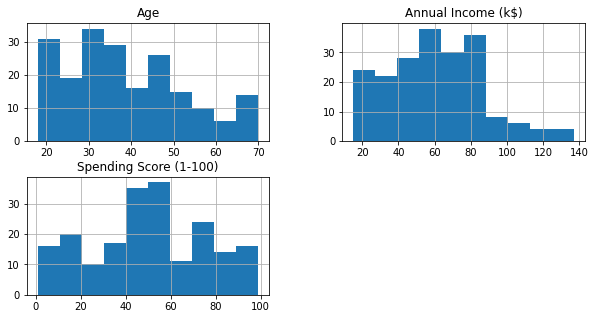

In [241]:
num_data = data.select_dtypes(include=int)
num_data.hist(grid=True,figsize=(10,5))


In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
X =  data.iloc[:,[2,3]].values 

### Our Candidate Models are Kmeans, Kmean-shift, Gaussian Mixture models  

In [244]:
from sklearn.cluster import KMeans


In [245]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


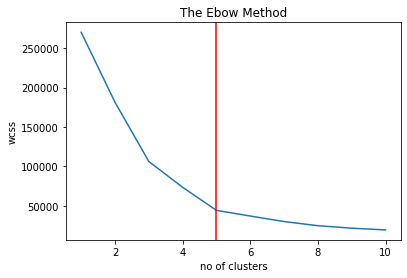

In [246]:
plt.plot(range(1,11),wcss)
plt.title('The Ebow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.axvline(x=5,color='r')
plt.show()

In [247]:
kmeansmodel = KMeans(n_clusters=5, init ='k-means++',random_state = 0)
y_kmeans = kmeansmodel.fit_predict(X)


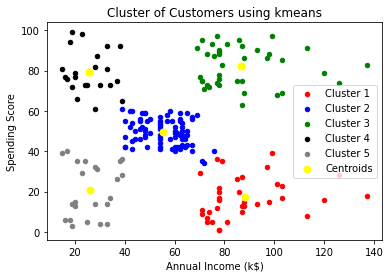

In [248]:
plt.title('Cluster of Customers using kmeans')
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0, 1],s=20 ,c='r', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1, 1],s=20 ,c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2, 1],s=20 ,c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3, 1],s=20 ,c='black', label ='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4, 1],s=20 ,c='gray', label ='Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1], s =50, c='yellow', label='Centroids')
plt.legend()
plt.show()

In [249]:
from sklearn.cluster import MeanShift

In [250]:
ms_model = MeanShift() 
y_mshift = ms_model.fit_predict(X)
y_mshift 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [251]:
from sklearn.mixture import GaussianMixture

gauss =  GaussianMixture(n_components = 5 ,random_state=0)

y_gauss =  gauss.fit_predict(X)

Text(0, 0.5, 'Spending Score')

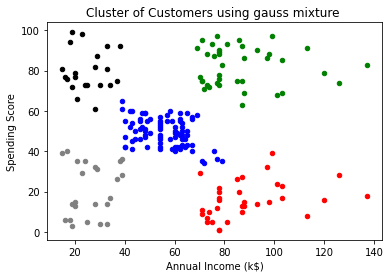

In [252]:
plt.title('Cluster of Customers using gauss mixture ')
plt.scatter(X[y_gauss == 0, 0],X[y_gauss == 0, 1],s=20 ,c='r', label ='Cluster 1')
plt.scatter(X[y_gauss== 1, 0],X[y_gauss == 1, 1],s=20 ,c='blue', label ='Cluster 2')
plt.scatter(X[y_gauss== 2, 0],X[y_gauss == 2, 1],s=20 ,c='green', label ='Cluster 3')
plt.scatter(X[y_gauss== 3, 0],X[y_gauss== 3, 1],s=20 ,c='black', label ='Cluster 4')
plt.scatter(X[y_gauss == 4, 0],X[y_gauss == 4, 1],s=20 ,c='gray', label ='Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

### Model Evaluation 

In [253]:
from sklearn.metrics import silhouette_score

In [254]:
sil_score = []
for label in [y_kmeans,y_gauss]:
    score = silhouette_score(X =X,labels= label)
    sil_score.append(score)
sil_score = pd.DataFrame(sil_score, index=['k_means','Gaussian'], columns=['score'] )
sil_score

,score
k_means,0.553932
Gaussian,0.552824


### Conclusion

1. Both Kmeans and Gaussian Mixture model were performing fairly good. 
2. Using their silhouette scores obtained, it is evident kmeans outperformed  GMM. 
3. This might not always be the case , if data distribution changes.